# **SUPPORT VECTOR MACHINE**

## **Import Package and Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math
from sklearn.svm import SVC, SVR
# SVC = Support Vector Classifier (SVM untuk klasifikasi)
# SVM = Support Vector Regressor (SVM untuk regresi)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from mlxtend.plotting import plot_decision_regions # untuk membuat plot SVM

import warnings
warnings.filterwarnings('ignore')

Import iris dataset menggunakan URL yang sudah disediakan

In [ ]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## **Preprocessing**

Sekarang kita akan melakukan preprocessing ringan. Kenapa kita perlu melakukan tahap ini? Karena jika kita lihat di data yang kita miliki, ada kolom **species** dan kolom tersebut masih bertipe string. Maka dari itu kita akan mengubahnya menjadi *integer* dengan *label encoder*

Panggil fungsi LabelEncoder() ke dalam sebuah variabel

In [ ]:
label_enc = LabelEncoder()

Lakukan fitting data menggunakan kolom **species**

In [ ]:
label_enc.fit(df['species'])

LabelEncoder()


Fitting data sudah selesai dilakukan, seperti yang kita ketahui bahwa label encoder mengubah data string menjadi integer dengan nilai 0,1,2,...,n sesuai dengan urutan data secara ascending. Jika kita ingin melihat urutannya lakukan seperti berikut ini

In [ ]:
label_enc.classes_


array(['setosa', 'versicolor', 'virginica'], dtype=object)

hasil di atas menunjukkan bahwa :

*   0 = setosa
*   1 = versicolor
*   2 = virginica

Selanjutnya kita akan mengubah datanya menjadi integer dengan melakukan transform

In [ ]:
enc = label_enc.transform(df['species'])
enc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Kita sudah mendapatkan hasil *label encoder* dalam bentuk **array**. Setalah itu, kita ubah ke dalam bentuk **dataframe**

In [ ]:
enc_fix = pd.DataFrame(enc)
enc_fix.columns = ['new_species']
enc_fix.head()

,new_species
0,0
1,0
2,0
3,0
4,0


Gabungkan dataframe *enc_fix* dengan dataframe utama

In [ ]:
data = df.join(enc_fix)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,new_species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


## **Create Model**



Untuk pembuatan modelnya ini data yang digunakan yaitu data dari variabel *sepal_length* dan *sepal_width*.



In [ ]:
X = data[['sepal_length','sepal_width']]
y = data['new_species']

sekarang kita akan split datatrain dan test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 45)

sekarang kita buat model SVCnya karena kita akan melakukan klasifikasi



In [ ]:
model = SVC(C=50,gamma=0.01,kernel='poly')
model

SVC(C=50, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## **Fit and Predict**

Lakukan fitting terhadap data training yang sudah di split

In [ ]:
model.fit(X_train, y_train)

SVC(C=50, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Lakukan prediksi 

In [ ]:
pred = model.predict(X_test)
pred

array([0, 0, 2, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 1, 1, 0, 2, 1, 0, 1, 1, 1,
       2, 2, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1, 0, 2, 0, 0, 2, 0, 0, 1, 0, 2,
       1])

In [ ]:
pd.DataFrame({'class actual' : label_enc.classes_[y_test], 'class predict' : label_enc.classes_[pred]})


,class actual,class predict
0,setosa,setosa
1,setosa,setosa
2,virginica,virginica
3,setosa,setosa
4,setosa,setosa
5,setosa,setosa
6,setosa,setosa
7,virginica,virginica
8,virginica,versicolor
9,virginica,virginica


Cek akurasi 

In [ ]:
model.score(X_test,y_test)

0.7333333333333333

In [ ]:
model.score(X_train,y_train)

0.8095238095238095

## **Visualize Model**

Sekarang kita coba visualisasikan model yang sudah kita buat dari data training dan data testing

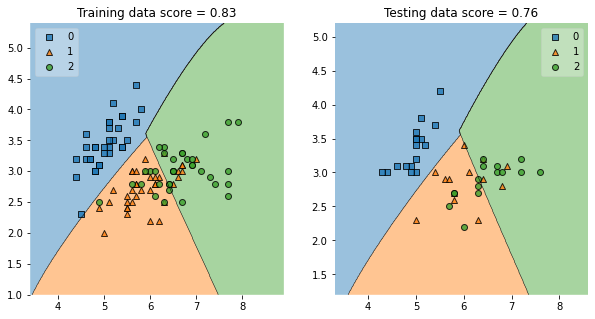

In [ ]:
plt.figure(figsize = (10,5))

plt.subplot(121)
plt.title('Training data score = %1.2f'%model.score(X_train, y_train))
plot_decision_regions(X= X_train.values, y= y_train.values, clf = model, legend = 2)

plt.subplot(122)
plt.title('Testing data score = %1.2f'%model.score(X_test, y_test))
plot_decision_regions(X= X_test.values, y= y_test.values, clf = model, legend = 1)

plt.show()

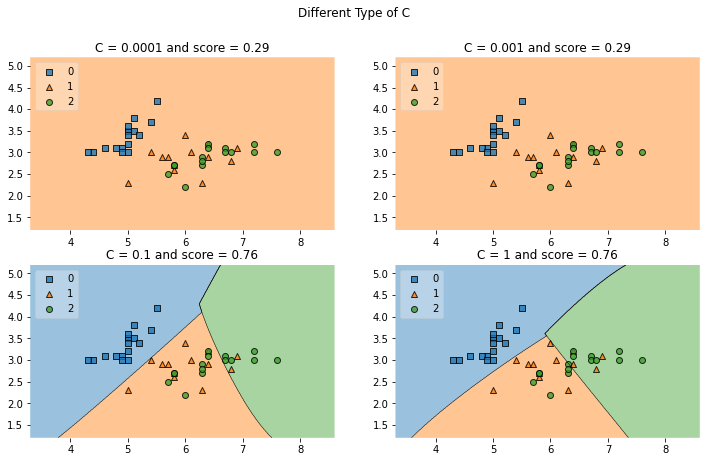

In [ ]:
param_c = [0.0001, 0.001, 0.1, 1]
plt.figure(figsize=(12,7))
plt.suptitle('Different Type of C')
for i in range (4):
    plt.subplot(2,2,i+1)
    model = SVC(C = param_c[i])
    model.fit(X_train, y_train)
    plot_decision_regions(X = X_test.values, y = y_test.values, clf = model, legend = 2)
    title = "C = " + str(param_c[i]) + " " + "and score = " + str(round(model.score(X_test,y_test),2))
    plt.title(title)

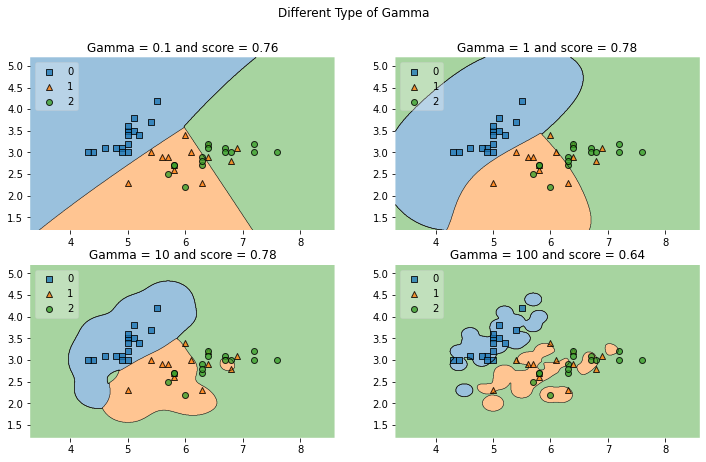

In [ ]:

param_gamma = [0.1, 1, 10, 100]
plt.figure(figsize=(12,7))
plt.suptitle('Different Type of Gamma')
for i in range (4):
    plt.subplot(2,2,i+1)
    model = SVC(gamma= param_gamma[i])
    model.fit(X_train, y_train)
    plot_decision_regions(X = X_test.values, y = y_test.values, clf = model, legend = 2)
    title = "Gamma = " + str(param_gamma[i]) + " " + "and score = " + str(round(model.score(X_test,y_test),2))
    plt.title(title)

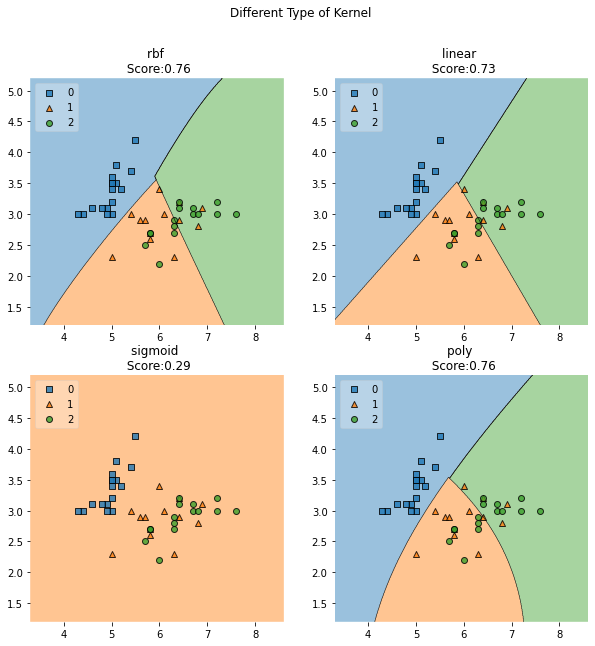

In [ ]:
param_kernel = ['rbf','linear','sigmoid','poly']
plt.figure(figsize = (10,10))
plt.suptitle('Different Type of Kernel')
for i in range (4):
    plt.subplot(2,2,i+1)
    model = SVC(kernel = param_kernel[i])
    model.fit(X_train, y_train)
    plot_decision_regions(X = X_test.values, y = y_test.values, clf = model, legend = 2)
    plt.title('%s \n Score:%1.2f' %(param_kernel[i], model.score(X_test, y_test)))